<a href="https://colab.research.google.com/github/MasoudMoeini/Synthetic-Blur-Detector-Network/blob/main/synthetic_image_blur_detector_show.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# load_model_sample.py
import tensorflow as tf
from tensorflow import keras
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import image
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from keras.applications.imagenet_utils import decode_predictions

In [18]:
!unzip -qq test-blurry-images.zip

In [19]:
!unzip -qq test-real-images.zip

replace __MACOSX/test-real-images/._307_HONOR-7X.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [20]:
model = load_model("image_blur_classifier.h5")
image_size = (244, 244)
files = glob.glob ("test-real-images/*.jpg")
scores = []
for myFile in files:
  img = keras.preprocessing.image.load_img(myFile,target_size=image_size)
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)
  predictions = model.predict(img_array)
  score = predictions[0]
  scores.append(100 * (1 - score[0]))

In [22]:
from PIL import Image
from numpy import *
test = []
files = glob.glob ("test-real-images/*.jpg")
for myFile in files:
    #image = cv2.imread (myFile)
    image = array(Image.open(myFile))
    test.append (image)
test = np.array(test) 
test= np.reshape(test,[test.shape[0],test.shape[1],test.shape[2],test.shape[3]])
np.save('test-real-images',test)

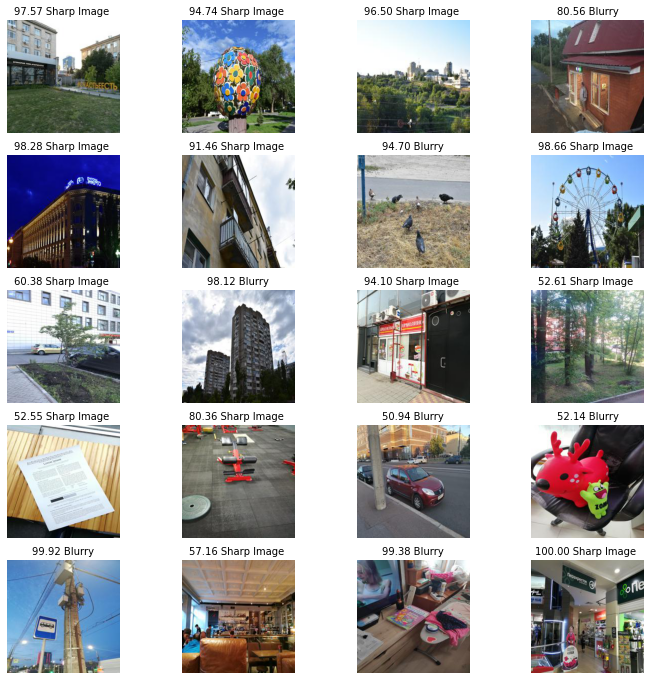

In [23]:
images = np.load('test-real-images.npy')
from keras.preprocessing.image import array_to_img
h = 10
fig = plt.figure(figsize=(12,12))
columns = 4
rows = 5
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns,i+1)
    plt.imshow(array_to_img(images[i]),cmap='binary')
    if scores[i]<50:
      plt.title("%.2f Sharp Image "% (100-scores[i]),fontsize=10)
      plt.axis("off")
    else:
      plt.title("%.2f Blurry"% (scores[i]),fontsize=10)
      plt.axis("off")
plt.show()

Processing input Blurry Images 

In [24]:
image_size = (244, 244)
files = glob.glob ("test-blurry-images/*.jpg")
scores = []
for myFile in files:
  img = keras.preprocessing.image.load_img(myFile,target_size=image_size)
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)
  predictions = model.predict(img_array)
  score = predictions[0]
  scores.append(100 * (1 - score[0]))

In [25]:
from PIL import Image
from numpy import *
test = []
files = glob.glob ("test-blurry-images/*.jpg")
for myFile in files:
    image = array(Image.open(myFile))
    test.append (image)
test = np.array(test) 
test= np.reshape(test,[test.shape[0],test.shape[1],test.shape[2],test.shape[3]])
np.save('test-blurry-images',test)

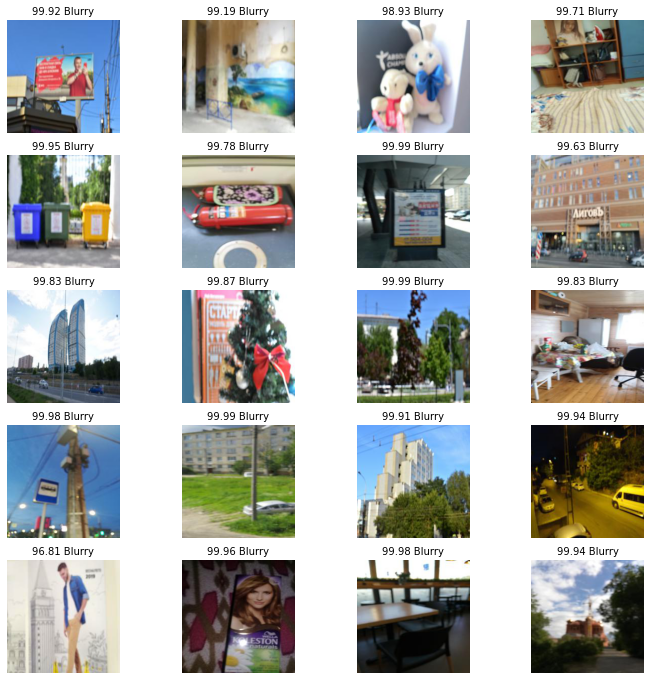

In [27]:
images = np.load('test-blurry-images.npy')
from keras.preprocessing.image import array_to_img
h = 10
fig = plt.figure(figsize=(12,12))
columns = 4
rows = 5
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns,i+1)
    plt.imshow(array_to_img(images[i]),cmap='binary')
    if scores[i]<50:
      plt.title("%.2f Sharp Image "% (100-scores[i]),fontsize=10)
      plt.axis("off")
    else:
      plt.title("%.2f Blurry"% (scores[i]),fontsize=10)
      plt.axis("off")
plt.show()

In [28]:
from keras.models import load_model
from PIL import Image
images = np.load('test-blurry-images.npy')
model = load_model("encoderdecoder_model.h5")
predictions=[]
batch_size=1
num_batches=len(images)//batch_size
for i in range(num_batches):
  img=images[i*batch_size : (i+1)*batch_size]
  img = img.astype(np.float32)/ 255.0
  pred = model.predict(img)
  predictions.append(pred)

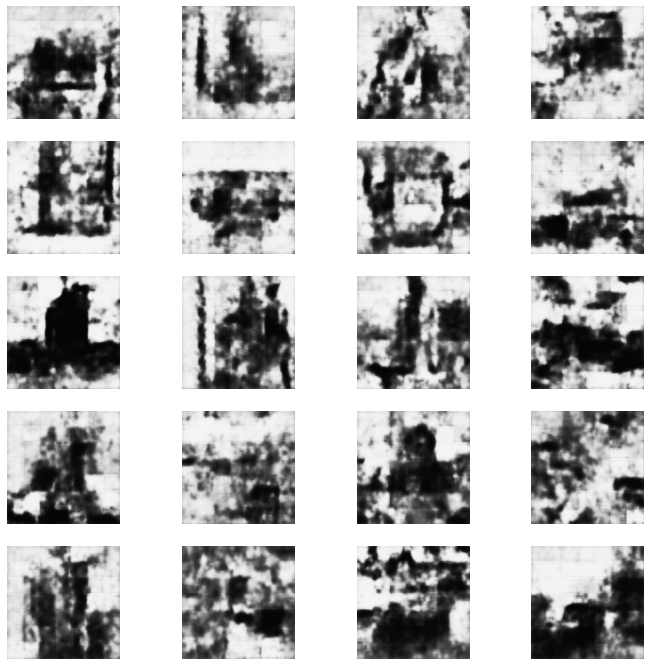

In [29]:
predictions=np.reshape(predictions,(len(images),224,224,3))
h = 10
fig = plt.figure(figsize=(12, 12))
columns = 4
rows = 5
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns,i+1)
    plt.imshow((predictions[i]*255.0).astype(np.uint8))
    plt.axis("off")
plt.show()

In [30]:
def blurry_regions_with_red_color(image,pred):
  main_picture = Image.fromarray(image)
  final_image = main_picture.copy()
  label_picture = Image.fromarray((pred*255.0).astype(np.uint8))
  label_to_gray = label_picture.convert('L')
  rescale_label=label_to_gray.copy()
  rescale_label= np.array(rescale_label).astype(np.float32)/255.0
  width, height = label_to_gray.size
  for x in range(0, width - 1):
    for y in range(0, height - 1):
        current_color = final_image.getpixel((x,y))
        if (label_to_gray.getpixel((x,y)))>230:
            final_image.putpixel((x,y),(255,0,0) )
  return final_image

# Process every pixel



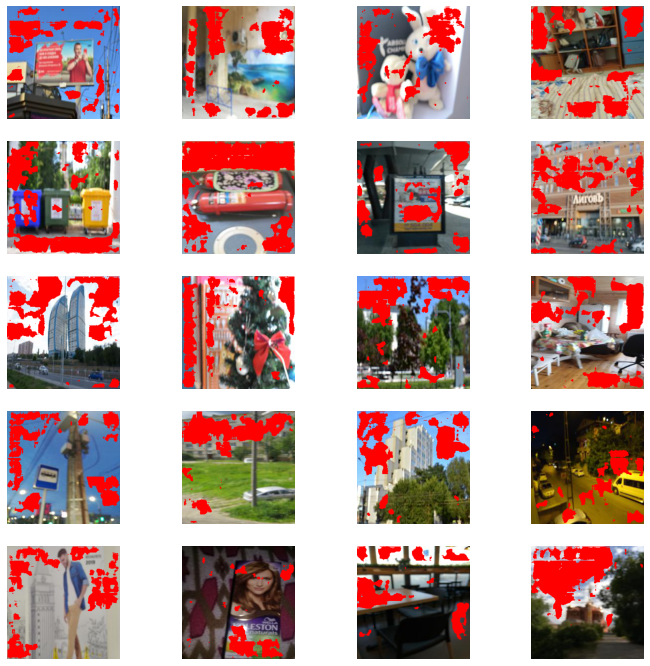

In [31]:
h = 10
fig = plt.figure(figsize=(12, 12))
columns = 4
rows = 5
for i in range(0, columns*rows):
  fig.add_subplot(rows, columns,i+1)
  plt.imshow(blurry_regions_with_red_color(images[i],predictions[i]),cmap='binary')
  plt.axis("off")
plt.show()